## Assignment 2: Create buffers around shopping centers 



In [1]:
import pathlib

# Setup data directory
NOTEBOOK_PATH = pathlib.Path("/geopython/Exercises/Exercise 3")
DATA_DIRECTORY = NOTEBOOK_PATH / "data"

### 

First, load the shopping centre *point* data set you created in *assignment 1* into a `GeoDataFrame` called `shopping_centres`.

,id,name,addr,address,geometry
0,1,Gallerian,"Hamngatan 37, 111 53 Stockholm","37, Hamngatan, Klara, Norrmalm, Norra innersta...",POINT (674473.725 6581089.637)
1,2,Mall of Scandinavia,"Stjärntorget 2, 169 79 Solna","Westfield Mall of Scandinavia, 2, Stjärntorget...",POINT (670635.567 6585150.741)
2,3,Solna Centrum,"Solnavägen 13, 171 45 Solna","13H, Solnavägen, Västra skogen, Solna Kyrkby, ...",POINT (671741.419 6583122.341)
3,4,Sturegallerian,"Sturegatan 4, 114 35 Stockholm","4, Sturegatan, Villastaden, Östermalm, Norra i...",POINT (674806.152 6581558.512)
4,5,Bergshamra Centrum,"Bergshamravägen 1, 170 72 Solna","Bergshamravägen, Kungshamra, Tivoli, Bergshamr...",POINT (672278.454 6586300.362)
5,6,Kista Galleria,"Hanstavägen 55 F, 164 53 Kista","Matmissionen, 55F, Hanstavägen, Kista, Järva s...",POINT (667039.837 6588778.684)


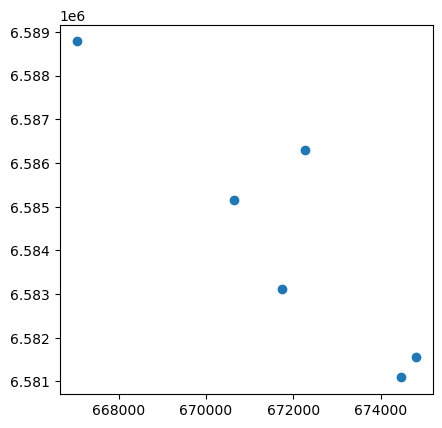

In [2]:
import geopandas as gpd

# Load points from from disk
shopping_centres = gpd.read_file(DATA_DIRECTORY / "shopping_centres.gpkg")

shopping_centres.plot()
shopping_centres

Calculate a 2 km buffer around the shopping locations. 
Use the geopandas.GeoDataFrame.buffer() method, that uses shapely’s buffer() in the background.

0    POLYGON ((676473.725 6581089.637, 676464.094 6...
1    POLYGON ((672635.567 6585150.741, 672625.936 6...
2    POLYGON ((673741.419 6583122.341, 673731.788 6...
3    POLYGON ((676806.152 6581558.512, 676796.522 6...
4    POLYGON ((674278.454 6586300.362, 674268.824 6...
5    POLYGON ((669039.837 6588778.684, 669030.207 6...
dtype: geometry

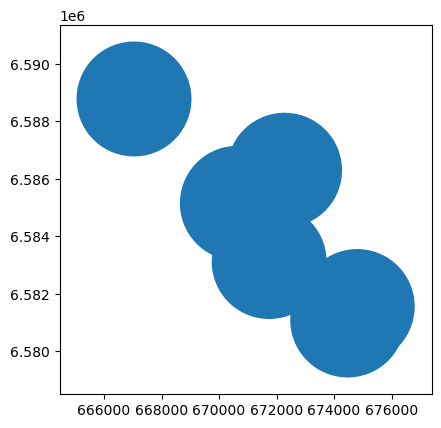

In [3]:
# Add buffers to the points, using the inbuild gpd method
# Since SWEREF99 uses m as unit, then 2km is 2000 distance units.
shopping_areas_buffer = shopping_centres.buffer(2000)

shopping_areas_buffer.plot()
shopping_areas_buffer

Save the data frame containing the buffer geometries into a new layer `buffers` as a .gpkg or .shp. Your buffers layer should contain the information for the shopping centers as well.

,id,name,addr,address,geometry
0,1,Gallerian,"Hamngatan 37, 111 53 Stockholm","37, Hamngatan, Klara, Norrmalm, Norra innersta...","POLYGON ((676473.725 6581089.637, 676464.094 6..."
1,2,Mall of Scandinavia,"Stjärntorget 2, 169 79 Solna","Westfield Mall of Scandinavia, 2, Stjärntorget...","POLYGON ((672635.567 6585150.741, 672625.936 6..."
2,3,Solna Centrum,"Solnavägen 13, 171 45 Solna","13H, Solnavägen, Västra skogen, Solna Kyrkby, ...","POLYGON ((673741.419 6583122.341, 673731.788 6..."
3,4,Sturegallerian,"Sturegatan 4, 114 35 Stockholm","4, Sturegatan, Villastaden, Östermalm, Norra i...","POLYGON ((676806.152 6581558.512, 676796.522 6..."
4,5,Bergshamra Centrum,"Bergshamravägen 1, 170 72 Solna","Bergshamravägen, Kungshamra, Tivoli, Bergshamr...","POLYGON ((674278.454 6586300.362, 674268.824 6..."
5,6,Kista Galleria,"Hanstavägen 55 F, 164 53 Kista","Matmissionen, 55F, Hanstavägen, Kista, Järva s...","POLYGON ((669039.837 6588778.684, 669030.207 6..."


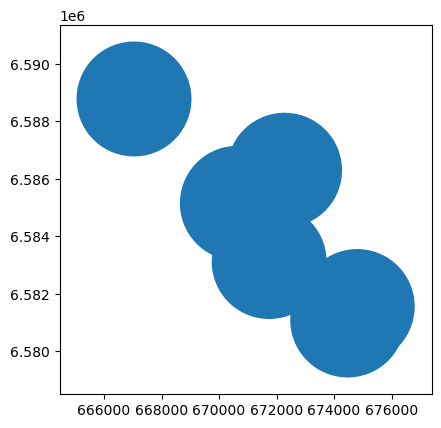

In [4]:
# Reuse the shopping_centres gdf by copying and replace points with buffer areas
shopping_areas = shopping_centres.copy()
shopping_areas["geometry"] = shopping_areas_buffer

shopping_areas.plot()
shopping_areas

In [5]:
# Save to disk
shopping_areas.to_file(DATA_DIRECTORY / "buffers.gpkg")

,id,name,addr,address,geometry
0,1,Gallerian,"Hamngatan 37, 111 53 Stockholm","37, Hamngatan, Klara, Norrmalm, Norra innersta...",POINT (674473.725 6581089.637)
1,2,Mall of Scandinavia,"Stjärntorget 2, 169 79 Solna","Westfield Mall of Scandinavia, 2, Stjärntorget...",POINT (670635.567 6585150.741)
2,3,Solna Centrum,"Solnavägen 13, 171 45 Solna","13H, Solnavägen, Västra skogen, Solna Kyrkby, ...",POINT (671741.419 6583122.341)
3,4,Sturegallerian,"Sturegatan 4, 114 35 Stockholm","4, Sturegatan, Villastaden, Östermalm, Norra i...",POINT (674806.152 6581558.512)
4,5,Bergshamra Centrum,"Bergshamravägen 1, 170 72 Solna","Bergshamravägen, Kungshamra, Tivoli, Bergshamr...",POINT (672278.454 6586300.362)
5,6,Kista Galleria,"Hanstavägen 55 F, 164 53 Kista","Matmissionen, 55F, Hanstavägen, Kista, Järva s...",POINT (667039.837 6588778.684)


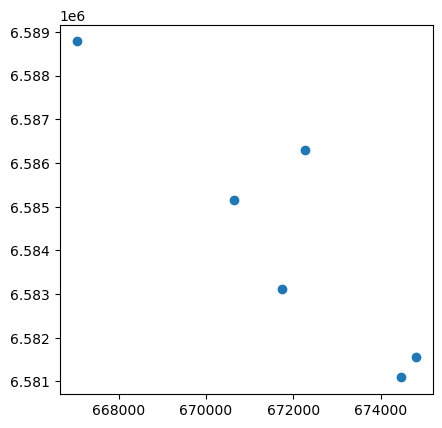

In [6]:
# Assert that the `shopping_centres` gpd was not altered (copy/pointer issue).
shopping_centres.plot()
shopping_centres